<a href="https://colab.research.google.com/github/Hbrand03/HarshilBrindaResume/blob/Python/IntroAI_Lab5_Decision_Tree_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5: Decision Tree Classification
Welcome to the assignment about Decision Tree Classification. A decision tree is a flowchart-like tree structure where an internal node represents a feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome.

The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in a recursive manner called recursive partitioning. This flowchart-like structure helps you in decision-making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

Source: https://www.datacamp.com/tutorial/decision-tree-classification-python

In this assignment, we will go together to learn how to train a decision tree using the Machine Learning tool [Scikit-learn](https://scikit-learn.org/stable/), then use it to resolve the classification problem - one of the most popular problem in Machine Learning.

There are 4 parts in this assignments:
* Read and understand the dataframe (25 pts)
* Train the model with Scikit-learn
  * Prepare the data for training (25 pts)
  * Train and visualize the decision tree (35 pts)
* Evaluate the trained model (15 pts)
* Analysis (Extra credit or 13.33 pts)



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn for tree
from sklearn import tree

In [ ]:
%%capture
!wget -O weather.csv https://webpages.charlotte.edu/tnguy248/itcs3153/weather.csv

# 1. Read the dataframe
In this assignment, we will use a modified dataset from [Kaggle](https://www.kaggle.com/datasets/ananthr1/weather-prediction) to train a decision tree.

The weather.csv consists 1281 rows (or samples). Each row inclues 5 columns (4 features and 1 output):
* precipitation: All forms in which water falls on the land surface and open water bodies as rain, sun.
* temp_max: Maximum Temperature
* temp_min: Minimum Temperature
* wind: Wind speed
* weather: this is the target label that we want to predict (rain or sun)


## 1.1. Load data file
Now, the dataset has been downloaded and saved into the file weather.csv. Please use the <code>read_csv</code> function from the pandas library to load the dataset, then save it into the <code>df</code> variable.

Ref: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

####<font color="green">**Exercise 1.a: Load dataframe using read_csv (5 pts)**</font>

In [ ]:
# This code should be 1 line, replace None to your code
# Begin your code
df = pd.read_csv('weather.csv')
# End your code

####<font color="green">**Exercise 1.b: Print some content of the dataset (5 pts)**</font>
Then, you can use <code>df.head()</code> or <code>df.tail()</code> to print the first or last 5 rows.

Read more: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html

In [ ]:
# Begin your code
print(df.head())

print(df.tail())
# End your code

   precipitation  temp_max  temp_min  wind weather
0           10.9      10.6       2.8   4.5    rain
1            0.8      11.7       7.2   2.3    rain
2           20.3      12.2       5.6   4.7    rain
3            1.3       8.9       2.8   6.1    rain
4            2.5       4.4       2.2   2.2    rain
      precipitation  temp_max  temp_min  wind weather
1276            0.0       4.4       0.0   2.5     sun
1277            8.6       4.4       1.7   2.9    rain
1278            1.5       5.0       1.7   1.3    rain
1279            0.0       5.6      -1.0   3.4     sun
1280            0.0       5.6      -2.1   3.5     sun


####<font color="green">**Exercise 1.c: Summary stats of dataset (5 pts)**</font>
One more helpful function of pandas library is <code>.describe()</code> which helps us generate descriptive statistics.

Read more: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

In [ ]:
# Begin your code
print(df.describe())
# End your code

       precipitation     temp_max     temp_min         wind
count    1281.000000  1281.000000  1281.000000  1281.000000
mean        3.281499    16.655738     8.465574     3.313427
std         6.939005     7.226486     4.870935     1.435877
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    11.100000     5.000000     2.300000
50%         0.000000    15.600000     8.300000     3.000000
75%         3.300000    22.200000    12.200000     4.100000
max        55.900000    35.600000    18.300000     9.500000


## 1.2. Understanding the data
A balanced dataset makes training a model easier because it helps prevent the model from becoming biased towards one class. Let's check to see whether this dataset is balanced or not.

This below code will count all samples with rain weather, then print the result.

In [ ]:
df_rain = df[df['weather'] == 'rain']
df_rain.shape[0]

641

####<font color="green">**Exercise 2.a: Count the sun weather (5 pts)**</font>

In [ ]:
# Begin your code
df_rain = df[df['weather'] == 'rain']
rain_count = df_rain.shape[0]
print(f"Number of samples with rain weather: {rain_count}")

# Counting samples with 'sun' weather
df_sun = df[df['weather'] == 'sun']
sun_count = df_sun.shape[0]
print(f"Number of samples with sun weather: {sun_count}")
# End your code

Number of samples with rain weather: 641
Number of samples with sun weather: 640


####<font color="green">**Exercise 2.b: Plot the weather counts (5 pts)**</font>
It's better if we can visualize it.
Now, using <code>df['weather']</code> to extract the weather column from the dataset, call <code>value_counts()</code> to get the frequency of each distinct row, then save into <code>df_weather</code> variable. After that, we can use <code>plot()</code> function to plot the new dataset.

Read more: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html

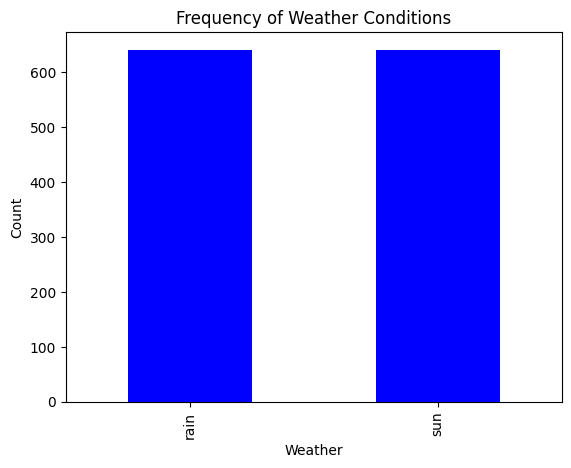

In [ ]:
# Create the df_weather variale and plot the data
# Extracting the weather column and calculating frequency of each condition
df_weather = df['weather'].value_counts()

# Plotting the frequency data
df_weather.plot(kind='bar', color='blue', title='Frequency of Weather Conditions')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.show()


# 2. Train the model with scikit-learn
Scikit-Learn, also known as sklearn is a python library to implement machine learning models and statistical modelling. Through scikit-learn, we can implement various machine learning models for regression, classification, clustering, and statistical tools for analyzing these models. It also provides functionality for dimensionality reduction, feature selection, feature extraction, ensemble techniques, and inbuilt datasets. We will be looking into these features one by one.

Read more: https://www.analyticsvidhya.com/blog/2021/07/15-most-important-features-of-scikit-learn/

## 2.1. Prepare the data for training
Now, we need to split the original dataset into 2 sub-dataset: training and testing. Training data is the subset of original data that is used to train the machine learning model, whereas testing data is used to check the accuracy of the model. The training dataset is generally larger in size compared to the testing dataset. (https://www.javatpoint.com/train-and-test-datasets-in-machine-learning)



Thanks to scikit-learn, we can do it easily with <code>train_test_split</code> function.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

####<font color="green">**Exercise 3: Split dataset to train and test sets (25 pts)**</font>
In this task, we need to:

* Extract the first 4 columns in the dataset, convert it to numpy array, then save into <code>X</code> variable. (5 pts) Note: You can use <code>.iloc</code> to extra the columns.

* Extract the last column in the dataset, convert it to numpy array, then save into <code>y</code> variable. (5 pts)

* Using <code>train_test_split</code> function to split the dataset with following parameters, then save them to <code>X_train, X_test, y_train, y_test</code> variables. (15 pts)
  * test_set = 0.2 (This parameter represents the proportion of the dataset to include in the test split. In this case, we will use 20% of the dataset for test set)
  * random_state=42 (This controls the shuffling process. When we set it to a integer number, the function will produce the same results across different executions)
  
  <font color="red">Note: If you don't set or set this param wrong, you will lose the points in this and later tasks</font>

Read more: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

# Extract the first 4 columns for features and convert them to a numpy array
X = df.iloc[:, :4].values

# Extract the last column for the target variable and convert it to a numpy array
y = df.iloc[:, -1].values

# Using train_test_split to split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 2.2. Train and visualize the decision tree
This is the pseudo code to build a decision tree from scratch.

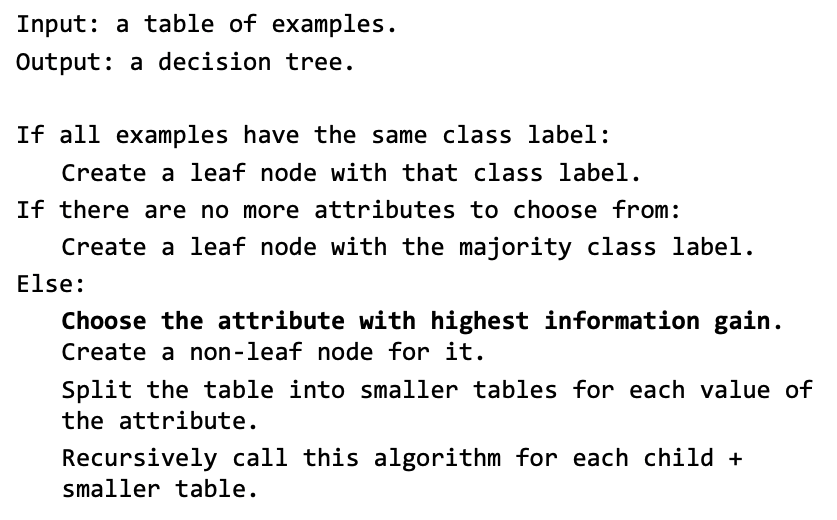

But in this assignment, we can use scikit-learn library to train a decision tree in short time.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

####<font color="green">**Exercise 4: Train a decision tree (25 pts)**</font>

1. Using <code>tree.DecisionTreeClassifier</code> to decalare a tree with <code>max_depth=6</code>, save it to <code>clf</code> variable. The hyperparameter <code>max_depth</code> controls the overall complexity of a decision tree. This hyperparameter allows to get a trade-off between an under-fitted and over-fitted decision tree.
2. Then use <code>fit</code> ([link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit)) to train the tree with train datasets. Using <code>X_train</code> and <code>y_train</code> as input.

Read more:



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Declare a Decision Tree Classifier with a maximum depth of 6
clf = DecisionTreeClassifier(max_depth=6)

# Train the classifier using the training datasets
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=6)

####<font color="green">**Exercise 5: Visualize the tree (10 pts)**</font>

https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#examples-using-sklearn-tree-plot-tree

Display the tree using <code>tree.plot_tree</code> function with params:
* filled = True
* class_names = ["Rain", "Sun"]
* feature_names: the name of all features in each row, except the output

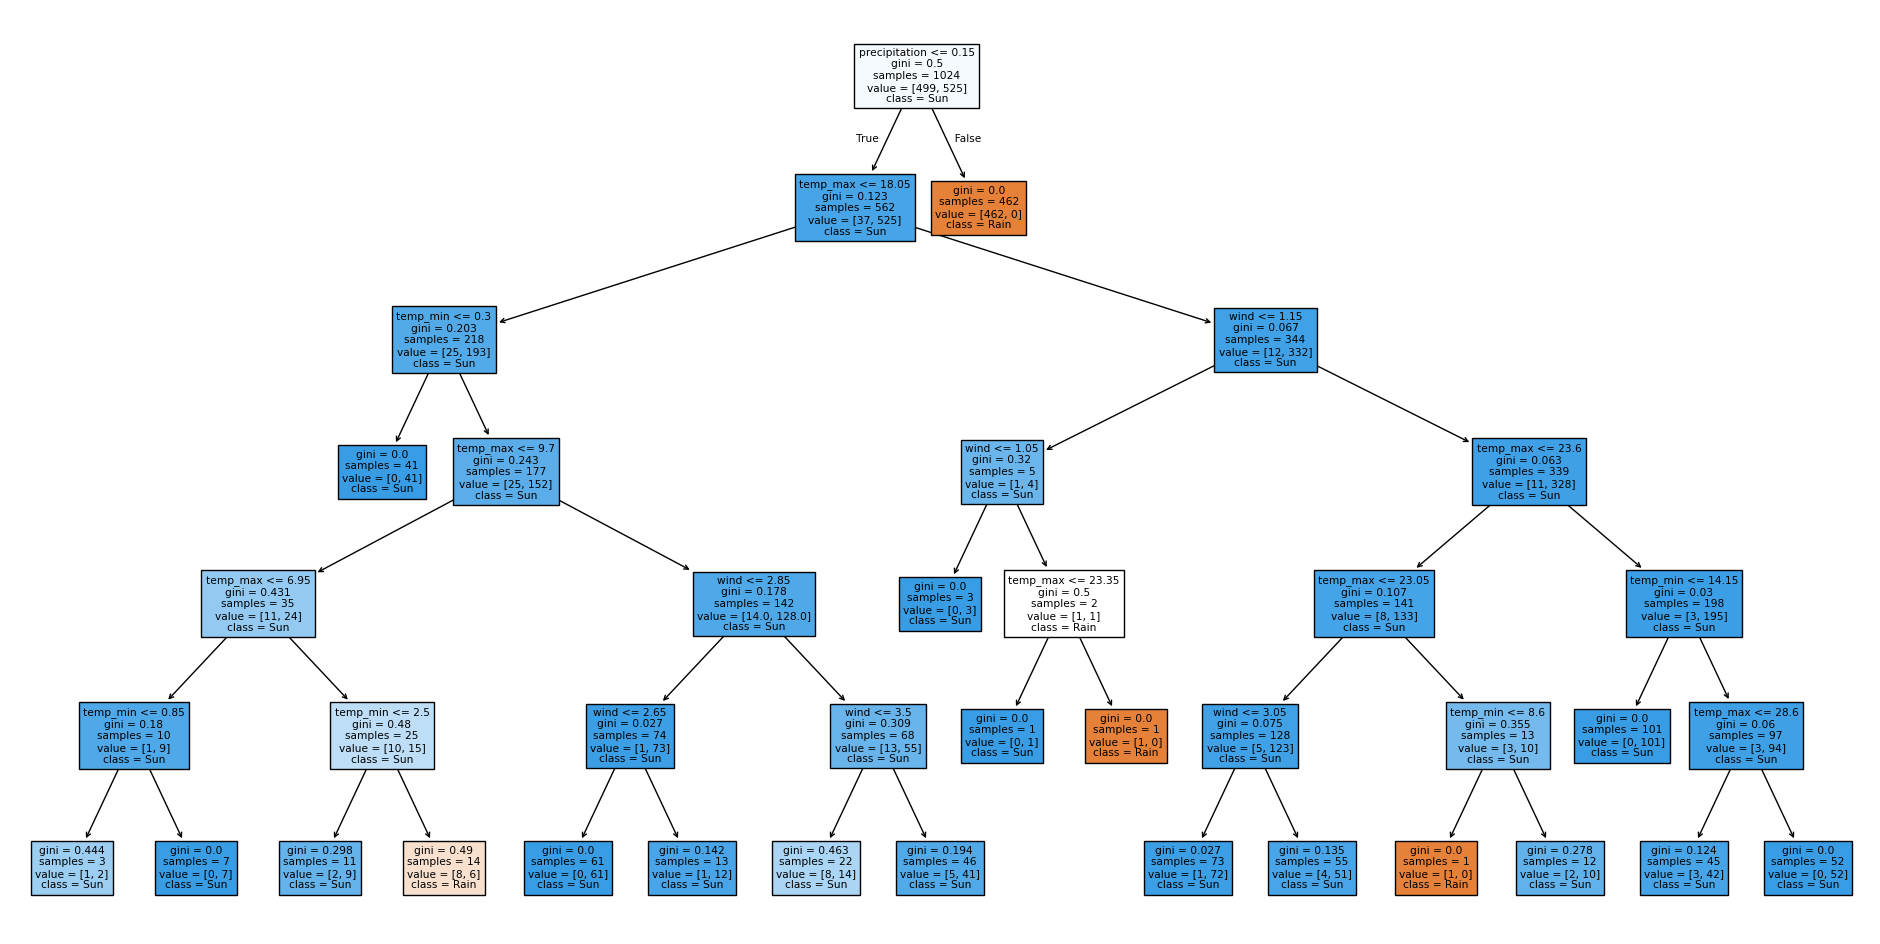

In [ ]:
from sklearn.tree import plot_tree

# Create a large figure to hold the plot
fig = plt.figure(figsize=(24, 12))

# Plot the decision tree
plot_tree(clf, filled=True, class_names=["Rain", "Sun"], feature_names=df.columns[:4])

# Display the plot
plt.show()


# 3. Evaluation

To check the trained tree is good or bad, we need to calculate the accuracy of that model with the test dataset.

####<font color="green">**Exercise 6: Evaluate the model (15 pts)**</font>
In this task, we will:
* Run <code>clf.predict()</code> ([link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict)) with <code>X_test</code> as input to predict the weather, then save them to <code>y_hat</code>.

* Using <code>accuracy_score</code> ([link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)) to get the accuracy rate of this model in the test data, than assign it to <code>score</code> variable. The input for this function are the predicted output <code>y_hat</code> and the real output <code>y_test</code>.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [ ]:
from sklearn.metrics import accuracy_score

# Predict the weather using the test dataset
y_hat = clf.predict(X_test)

# Calculate the accuracy of the model on the test data
score = accuracy_score(y_test, y_hat)

# Print the accuracy score
print("Accuracy of the decision tree model:", score)


Accuracy of the decision tree model: 0.9688715953307393


# 4. Model Analysis (Extra credit)


<font color="green">**Extra Credit 1: From the trained tree, predict the weather (8 pts)**</font>

* Case 1: precipitation = 2, temp_max=20, temp_min=5, wind=10
* Case 2: precipitation = 0, temp_max=20, temp_min=5, wind=1.1


<font color="green">**Your answer:**</font>
* Case 1:
* Case 2:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Re-train a new decision tree with the same configuration
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X_train, y_train)

# Define the test cases
test_cases = np.array([
    [2, 20, 5, 10],  # Case 1
    [0, 20, 5, 1.1]  # Case 2
])

# Predict the weather for the defined test cases
y_hat_cases = clf.predict(test_cases)

# Output the predictions
print("Case 1 Prediction:", "Rain" if y_hat_cases[0] == 'rain' else "Sun")
print("Case 2 Prediction:", "Rain" if y_hat_cases[1] == 'rain' else "Sun")


Case 1 Prediction: Rain
Case 2 Prediction: Sun


<font color="green">**Extra Credit 2: Try to train a new decision tree without max_depth param, then answer following questions (5.33 pts)**</font>

* What is the new accuracy score?
* The new score is lower than the old one. Do you know what the name of this issue in the new model?

<font color="green">**Your answer:**</font>

Answer: The new accuracy score is lower than the previous model with max_depth=6. This decrease in performance on the test dataset indicates that the new model is likely overfitting. Overfitting occurs when a model is excessively complex, capturing noise in the training data which does not generalize well to new, unseen data. This issue arises because the model without a max_depth parameter grows too deep and specific to the training set, failing to predict new instances accurately.
